<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Создание-подвыборок" data-toc-modified-id="Создание-подвыборок-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Создание подвыборок</a></span></li><li><span><a href="#Токенизация" data-toc-modified-id="Токенизация-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Токенизация</a></span></li><li><span><a href="#Создание-эмбеддингов" data-toc-modified-id="Создание-эмбеддингов-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Создание эмбеддингов</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Фичи-и-таргеты" data-toc-modified-id="Фичи-и-таргеты-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Фичи и таргеты</a></span></li><li><span><a href="#Логистическая-регрессия-CV" data-toc-modified-id="Логистическая-регрессия-CV-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Логистическая регрессия CV</a></span></li><li><span><a href="#Дерево-решений-CV" data-toc-modified-id="Дерево-решений-CV-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Дерево решений CV</a></span></li><li><span><a href="#Случайный-лес-CV" data-toc-modified-id="Случайный-лес-CV-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Случайный лес CV</a></span></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Тестирование</a></span><ul class="toc-item"><li><span><a href="#Анализ-модели-на-тестовой-выборке" data-toc-modified-id="Анализ-модели-на-тестовой-выборке-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Анализ модели на тестовой выборке</a></span></li><li><span><a href="#Анализ-модели-на-адекватность" data-toc-modified-id="Анализ-модели-на-адекватность-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Анализ модели на адекватность</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Проект для «Викишоп» BERT

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучите модель классифицировать комментарии на позитивные и негативные. В вашем распоряжении набор данных с разметкой о токсичности правок.

Постройте модель со значением метрики качества *F1* не меньше 0.75. 

**Инструкция по выполнению проекта**

1. Загрузите и подготовьте данные.
2. Обучите разные модели. 
3. Сделайте выводы.

Для выполнения проекта применять *BERT* необязательно, но вы можете попробовать.

**Описание данных**

Данные находятся в файле `toxic_comments.csv`. Столбец *text* в нём содержит текст комментария, а *toxic* — целевой признак.

## Подготовка

### Загрузка данных

Импортируем необходимые библиотеки и загрузим данные.

In [1]:
#pip install detoxify

In [2]:
import pandas as pd
import numpy as np
import torch
import transformers
import matplotlib.pyplot  as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyRegressor

from sklearn.metrics import f1_score
from tqdm import notebook
#Константы
RANDOM_STATE = 12345

In [3]:
try:
    data = pd.read_csv('.../toxic_comments.csv',index_col=[0])
except:
    data = pd.read_csv('.../toxic_comments.csv',index_col=[0])
data.head(3)

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0


In [4]:
data.shape

(159292, 2)

Данные загружены, таблица содержит 159тыс. комменатриев и целевой признак - является ли комментарий токсичным.

### Анализ

Посмотрим на долю токсичных и нетоксичных комментариев в данных

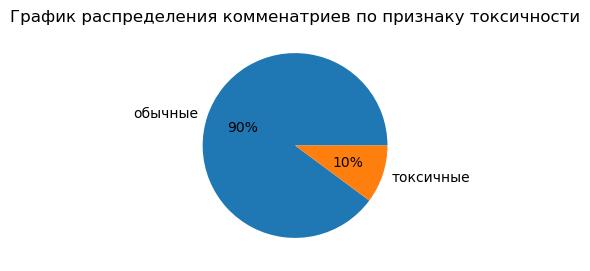

Обычных комменатриев: 16186
Токсичных комменатриев: 143106


In [5]:
toxic_count = data.groupby(by='toxic').count()
labels = ['обычные','токсичные'] #toxic_count.index
plt.subplots(figsize=(13, 3))
plt.pie(data=toxic_count, labels=labels, x=toxic_count['text'], autopct='%.0f%%')
plt.title('График распределения комменатриев по признаку токсичности')
plt.show()
print('Обычных комменатриев:', toxic_count[toxic_count.index==1]['text'].values[0])
print('Токсичных комменатриев:', toxic_count[toxic_count.index==0]['text'].values[0])

Видим, что только 10% всех комментариев являются токсичными. То есть, данные являются несбалансированными. Проведем балансировку, это также поможет уменьшить объем выборки и легче токенизировать данные. 

### Создание подвыборок

Уменьшим общий объем выборки, применив сэмплирование и балансировку классов.
<br> Возьмем для примера ~2% всех данных (2800 строк суммарно на обучающую и тестовую выборки).
<br> 1400 строк - в обучающую выборку и столько же - в тестовую.
<br> В каждой выборке 700 позитивных комментариев и 700 токсичных.

In [6]:
data_zeroes = data[data['toxic']==0]
data_ones = data[data['toxic']==1]

data_train = pd.concat([data_zeroes.sample(n=1800, random_state=RANDOM_STATE) , \
                        data_ones.sample(n=200, random_state=RANDOM_STATE) ])
data_test = pd.concat([data_zeroes.sample(n=1800, random_state=RANDOM_STATE) , \
                        data_ones.sample(n=200, random_state=RANDOM_STATE) ]) # 90% обычных отзывов 10% токсичных отзывов
print('Размер обучающей выборки:',data_train.shape)
toxic_count_train = data_train.groupby(by='toxic').count()
print('Соотношение классов в обучающей выборке:',toxic_count_train)
print('Размер тестовой выборки:',data_train.shape)
toxic_count_test = data_test.groupby(by='toxic').count()
print('Соотношение классов в тестовой выборке:',toxic_count_test)

Размер обучающей выборки: (2000, 2)
Соотношение классов в обучающей выборке:        text
toxic      
0      1800
1       200
Размер тестовой выборки: (2000, 2)
Соотношение классов в тестовой выборке:        text
toxic      
0      1800
1       200


В каждой выборке осталась часть обычных комментариев и часть токсичных. 

### Токенизация

In [7]:
PRETRAINED_MODEL_NAME = 'unitary/toxic-bert'
tokenizer = transformers.BertTokenizer.from_pretrained(PRETRAINED_MODEL_NAME)

tokenized_train = data_train['text'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True, truncation=True, max_length=512))

max_len = 0
for i in tokenized_train.values:
    if len(i) > max_len:
        max_len = len(i)

padded_train = np.array([i + [0]*(max_len - len(i)) for i in tokenized_train.values])

attention_mask_train = np.where(padded_train != 0, 1, 0)

In [8]:
attention_mask_train.shape

(2000, 512)

Проведем аналогичную токенизацию для тестовой выборки:

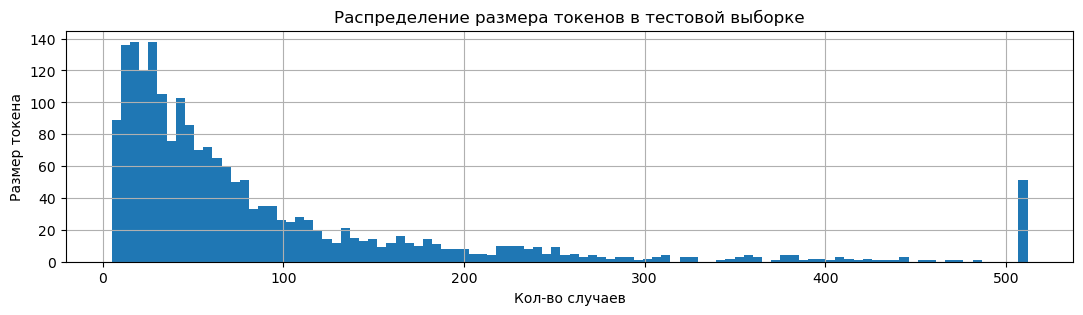

In [9]:
tokenized_test = data_test['text'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True, truncation=True, max_length=512))

max_len = 0
for i in tokenized_test.values:
    if len(i) > max_len:
        max_len = len(i)

padded_test = np.array([i + [0]*(max_len - len(i)) for i in tokenized_test.values])

attention_mask_test = np.where(padded_test != 0, 1, 0)
        
token_lengths = tokenized_test.apply( lambda x: len(x))
token_lengths.hist(bins=100,figsize=(13, 3))

plt.title('Распределение размера токенов в тестовой выборке')
plt.xlabel('Кол-во случаев')
plt.ylabel('Размер токена');

Теперь обе выборки токенизированы и длина маски не превышает 512 токенов.

### Создание эмбеддингов

Загрузим и настроим предобученную модель BERT.

In [10]:
config = transformers.BertConfig.from_pretrained(PRETRAINED_MODEL_NAME)

In [11]:
model = transformers.BertModel.from_pretrained(PRETRAINED_MODEL_NAME)

Создадим эмбеддинги для тренировочной выборки:

In [12]:
batch_size = 100
embeddings_train = []
for i in notebook.tqdm(range(padded_train.shape[0] // batch_size)):
        batch = torch.LongTensor(padded_train[batch_size*i:batch_size*(i+1)]) 
        attention_mask_batch = torch.LongTensor(attention_mask_train[batch_size*i:batch_size*(i+1)])
        
        with torch.no_grad():
            batch_embeddings = model(batch, attention_mask=attention_mask_batch)
        
        embeddings_train.append(batch_embeddings[0][:,0,:].numpy())

  0%|          | 0/20 [00:00<?, ?it/s]

Создадим эмбеддинги для тестовой выборки:

In [13]:
batch_size = 100
embeddings_test = []
for i in notebook.tqdm(range(padded_test.shape[0] // batch_size)):
        batch = torch.LongTensor(padded_test[batch_size*i:batch_size*(i+1)]) 
        attention_mask_batch = torch.LongTensor(attention_mask_test[batch_size*i:batch_size*(i+1)])
        
        with torch.no_grad():
            batch_embeddings = model(batch, attention_mask=attention_mask_batch)
        
        embeddings_test.append(batch_embeddings[0][:,0,:].numpy())

  0%|          | 0/20 [00:00<?, ?it/s]

In [14]:
embeddings_train[1]

array([[-0.4926552 , -0.8001903 ,  0.7436203 , ..., -0.83074576,
         0.7553789 ,  0.26054448],
       [-0.5865201 , -0.9710945 ,  0.8334135 , ..., -0.73966813,
         0.55574304,  0.05664505],
       [-0.6099569 , -1.0259919 ,  0.55332303, ..., -0.7447345 ,
         0.472082  , -0.00774015],
       ...,
       [-0.60239726, -1.0852746 ,  0.47809282, ..., -0.6763294 ,
         0.35242367,  0.06747116],
       [-0.9858994 , -1.2230151 , -0.20723644, ..., -0.55062926,
         0.11585799,  0.6523209 ],
       [-0.7448426 , -0.9864907 ,  0.52729625, ..., -0.76446754,
         0.41967875,  0.1143003 ]], dtype=float32)

In [15]:
embeddings_test[1]

array([[-0.4926552 , -0.8001903 ,  0.7436203 , ..., -0.83074576,
         0.7553789 ,  0.26054448],
       [-0.5865201 , -0.9710945 ,  0.8334135 , ..., -0.73966813,
         0.55574304,  0.05664505],
       [-0.6099569 , -1.0259919 ,  0.55332303, ..., -0.7447345 ,
         0.472082  , -0.00774015],
       ...,
       [-0.60239726, -1.0852746 ,  0.47809282, ..., -0.6763294 ,
         0.35242367,  0.06747116],
       [-0.9858994 , -1.2230151 , -0.20723644, ..., -0.55062926,
         0.11585799,  0.6523209 ],
       [-0.7448426 , -0.9864907 ,  0.52729625, ..., -0.76446754,
         0.41967875,  0.1143003 ]], dtype=float32)

Эмбеддинги созданы. Можно переходить к обучению модели.

## Обучение

### Фичи и таргеты

In [16]:
features_train = np.concatenate(embeddings_train)
target_train = data_train['toxic']

features_test = np.concatenate(embeddings_test)
target_test = data_test['toxic']

### Логистическая регрессия CV

In [17]:
model_logreg_cv = LogisticRegression(random_state=RANDOM_STATE, class_weight='balanced') 
params_grid = { 'solver':  ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
               #'penalty' : ['none', 'l1', 'l2', 'elasticnet'],
               'C' : [100, 10, 1.0, 0.1, 0.01]}

In [18]:
msearch = GridSearchCV(model_logreg_cv, params_grid, scoring='f1', cv=5)
msearch.fit(features_train, target_train)

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=12345),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1')

In [19]:
logreg_f1 = round(msearch.best_score_,3)
print('F1 логистической регрессии с кроссвалидацией:',logreg_f1)
logreg_best_model = msearch.best_estimator_
print('Параметры лучшей модели:', logreg_best_model)

F1 логистической регрессии с кроссвалидацией: 0.946
Параметры лучшей модели: LogisticRegression(class_weight='balanced', random_state=12345, solver='saga')


Добавим данные в табличку, где будем сравнивать разные модели.

In [20]:
models_results = pd.DataFrame(columns=['model', 'best_model','F1'])
row1 = pd.DataFrame({'model': ['LogisticRegression'],'best_model':[logreg_best_model],'F1': [logreg_f1]})

models_results = pd.concat([row1,models_results.loc[:]]).reset_index(drop=True)

display(models_results.sort_values(by='F1').style.background_gradient(cmap='Blues', axis=0,subset=['F1']))

C:\Users\PC\AppData\Local\Temp\ipykernel_31648\77065362.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  models_results = pd.concat([row1,models_results.loc[:]]).reset_index(drop=True)


,model,best_model,F1
0,LogisticRegression,"LogisticRegression(class_weight='balanced', random_state=12345, solver='saga')",0.946000


Данные по логистической регресси посчитаны и добавлены в табличку.

### Дерево решений CV 

In [21]:
model_tree_cv = DecisionTreeClassifier() 
params_grid = {#'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
               'splitter':['best', 'random'],
               'max_depth': range(1,10),
               'random_state':[RANDOM_STATE],
               'max_features':['sqrt','log2']
                }

In [22]:
msearch = GridSearchCV(model_tree_cv, params_grid, scoring='f1', cv=5)
msearch.fit(features_train, target_train);

In [23]:
tree_f1 = round(msearch.best_score_,3)
print('F1 дерева решений с кроссвалидацией:',tree_f1)
tree_best_model = msearch.best_estimator_
print('Параметры лучшей модели:', tree_best_model)

F1 дерева решений с кроссвалидацией: 0.922
Параметры лучшей модели: DecisionTreeClassifier(max_depth=2, max_features='sqrt', random_state=12345,
                       splitter='random')


In [24]:
row1 = pd.DataFrame({'model': ['DecisionTreeClassifier'],'best_model':[tree_best_model],'F1': [tree_f1]})
models_results = models_results = pd.concat([row1,models_results.loc[:]]).reset_index(drop=True)
display(models_results.sort_values(by='F1').style.background_gradient(cmap='Blues', axis=0,subset=['F1']))

,model,best_model,F1
0,DecisionTreeClassifier,"DecisionTreeClassifier(max_depth=2, max_features='sqrt', random_state=12345, splitter='random')",0.922000
1,LogisticRegression,"LogisticRegression(class_weight='balanced', random_state=12345, solver='saga')",0.946000


Данные по решающему дереву также посчитаны и добавлены. Видим, что результат на дереве получился чуть-чуть хуже.

### Случайный лес CV

In [25]:
model_forest_cv = RandomForestClassifier() 
params_grid = {'max_depth': range(1,10),
               'n_estimators':range(10,100,10),
               'random_state':[RANDOM_STATE],
               'max_features':['sqrt', 'log2']
               }

In [26]:
msearch = GridSearchCV(model_forest_cv, params_grid, scoring='f1', cv=5)
msearch.fit(features_train, target_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(1, 10),
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': range(10, 100, 10),
                         'random_state': [12345]},
             scoring='f1')

In [27]:
forest_f1 = round(msearch.best_score_,3)
print('F1 случайного леса с кроссвалидацией:',forest_f1)
forest_best_model = msearch.best_estimator_
print('Параметры лучшей модели:', forest_best_model)

F1 случайного леса с кроссвалидацией: 0.952
Параметры лучшей модели: RandomForestClassifier(max_depth=2, n_estimators=40, random_state=12345)


In [28]:
row1 = pd.DataFrame({'model': ['RandomForestClassifier'],'best_model':[forest_best_model],'F1': [forest_f1]})
models_results = models_results = pd.concat([row1,models_results.loc[:]]).reset_index(drop=True)
display(models_results.sort_values(by='F1').style.background_gradient(cmap='Blues', axis=0,subset=['F1']))

,model,best_model,F1
1,DecisionTreeClassifier,"DecisionTreeClassifier(max_depth=2, max_features='sqrt', random_state=12345, splitter='random')",0.922000
2,LogisticRegression,"LogisticRegression(class_weight='balanced', random_state=12345, solver='saga')",0.946000
0,RandomForestClassifier,"RandomForestClassifier(max_depth=2, n_estimators=40, random_state=12345)",0.952000


**Вывод:** видим, что во всех трех моделях метрика выше 0,9, что соответствует условию задачи (получить F1>0,75)
<br> Наилучшую метрику показала модель случайного леса. Протестируем эту модель на тестовой выборке.

## Тестирование

### Анализ модели на тестовой выборке

Протестируем лучшую модель на тестовой выборке.

In [29]:
model = forest_best_model 
model.fit(features_train,target_train) 
predictions_test = model.predict(features_test) 
f1_best = f1_score(target_test,predictions_test)
print('Метрика F1 модели случайного леса на тестовой выборке:',f1_best)

Метрика F1 модели случайного леса на тестовой выборке: 0.9631449631449631


Метрика на тестовой выборке также показала высокий результат - **F1=0,963** (получилось даже выше чем при кроссвалидации, возможно из-за того, что обучающий набор получился чуть больше, чем при кроссвалидации).

### Анализ модели на адекватность

Сравним полученную модель против dummy-модели, предсказывающей 0, т.е. больший класс.

In [30]:
dummy_regr = DummyRegressor(strategy='constant', constant=0)
dummy_regr.fit(features_train, target_train)
dummy_predict = dummy_regr.predict(features_test)
dummy_test_f1 = f1_score(target_test,dummy_predict)
print('Оценка F1 на модели dummy:',dummy_test_f1)

Оценка F1 на модели dummy: 0.0


Как видим, такая модель имеет метрику, равную 0 из-за особенностей подсчета F1, которая балансирует точность и полноту.
<br> Таким образом, наша выбранная модель является адекватной.

## Выводы

Исходным заданием было разработать инструмент, который будет искать токсичные комментарии и отправлять их на модерацию, а также о
Обучите модель классифицировать комментарии на позитивные и негативн.

**В ходе подготовки данных:**
- был загружен исходный набор данных, который содержал почти 160тыс. строк и 2 колонки: комментарий и признак токсичности (0-позитивный, 1 - токсичный).
- анализ данных показал, что 90% комментариев позитивные и 10% - токсичные.
- для обучающей и тестовой подвыборок было выделено по 2000 наблюдений (1800 позитивных и 200 токсичных), то есть был сохранен теущий дисбаланс классов
- для создания эмбеддингов была загружена и настроена предобученная модель BERT

**В ходе обучения моделей:**
- были обучены и провалидированы с кроссвалидацие следующие модели:
    - модель логистической регрессии
    - модель решающего дерева
    - модель случайного леса 
- Лучший результат при кроссвалидации показала модель случайного леса

**В ходе тестирования модели:**
- выбранная модель случайного леса была протестирована на тестовой выборке и показала результат F1=0,963
- модель также была проверена против dummy-модели, предсказывающей больший класс. Результат F1 для dummy равен 0.